# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Mearging 12 Months of Sale data files into Single File

In [2]:
import pandas as pd
import os

# Path to the folder containing the CSV files
path = "./Sales_Data"

# List all files in the directory
files = [file for file in os.listdir(path) if file.endswith(".csv")]

# Create an empty DataFrame to store the combined data
all_months_data = pd.DataFrame()

# Loop through each file and append its data to the combined DataFrame
for file in files:
    current_df = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_df])

# Save the combined DataFrame to a new CSV file
all_months_data.to_csv("all_sales_data.csv", index=False)

#### Read in Updated DataFrame

In [3]:
all_data = pd.read_csv("all_sales_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning Up Data

In [4]:
# Checking Missing Values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Droping Duplicates And Null Values
all_data = all_data.drop_duplicates().dropna()

In [7]:
# Checking Missing Values
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
# Checking Columns types
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Converting data type in correct format

In [10]:
# Step 1: Convert Quantity Ordered to integer
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors="coerce").astype("Int32")

# Step 2: Convert Price Each to float
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors="coerce").astype("float32")

# Step 3: Convert Order Date to datetime
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")

# Step 4: Drop rows with NaN in any of the above key columns
all_data.dropna(subset=["Quantity Ordered", "Price Each", "Order Date"], inplace=True)

# Step 5: Create a 'Month' column from 'Order Date'
all_data["Month"] = all_data["Order Date"].dt.month

# Step 6: Create an 'Hour' column from 'Order Date'
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

# Step 7: Create a 'Sales' column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

# Step 8: Create a 'City' column extracted from 'Purchase Address'
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Optional: Reset index after dropping
all_data.reset_index(drop=True, inplace=True)

# Preview cleaned data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.9,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.989998,Boston (MA)
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.0,Los Angeles (CA)
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99,Los Angeles (CA)


In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  Int32         
 3   Price Each        185686 non-null  float32       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int32         
 7   Hour              185686 non-null  int32         
 8   Minute            185686 non-null  int32         
 9   Sales             185686 non-null  Float64       
 10  City              185686 non-null  object        
dtypes: Float64(1), Int32(1), datetime64[ns](1), float32(1), int32(3), object(4)
memory usage: 12.4+ MB


#### Question 1: What was the best month for sales? How much was earned that month?

In [12]:
result = all_data.groupby("Month").sum(numeric_only=True)
result

,Quantity Ordered,Price Each,Hour,Minute,Sales
Month,,,,,
1,10893,1810924.750,139339,282230,1821413.151357
2,13431,2186940.250,172392,354307,2200078.068351
3,16979,2789084.750,218622,446783,2804973.335679
4,20536,3366218.750,261916,543611,3389217.963178
5,18653,3133134.500,238580,487579,3150616.214925
6,15234,2560503.500,195223,401839,2576280.137285
7,16054,2631225.000,205909,416896,2646461.306813
8,13429,2226964.000,172049,353246,2241083.358615
9,13091,2081897.625,168206,341151,2094465.679431


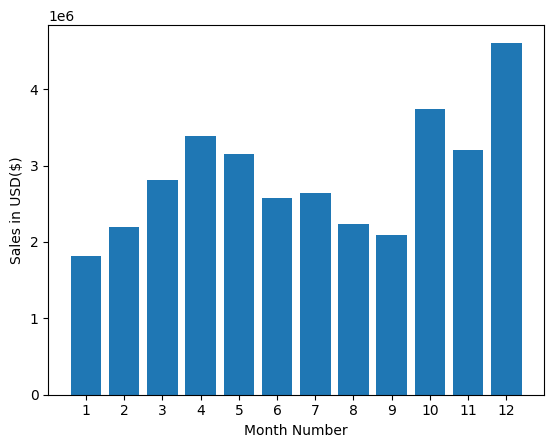

In [13]:
Months = range(1,13)
plt.bar(Months, result["Sales"])
plt.xticks(Months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD($)")
plt.show()

#### Question 2: What city had the highest number of sales?

In [14]:
result = all_data.groupby("City").sum(numeric_only=True)
result

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
City,,,,,,
Atlanta (GA),16584,2.778609e+06,104649,214003,442412,2794199.055938
Austin (TX),11137,1.808340e+06,69720,141688,288674,1818044.320764
Boston (MA),22494,3.634398e+06,140898,287705,589414,3658627.631327
Dallas (TX),16707,2.750026e+06,104447,214078,434330,2765373.945909
Los Angeles (CA),33247,5.417172e+06,208020,426924,865442,5448304.252886
New York City (NY),27903,4.632920e+06,175557,357214,733011,4661867.116625
Portland (ME),2746,4.467523e+05,17119,35152,72743,449321.377818
Portland (OR),11291,1.859836e+06,70517,144242,295104,1870010.550701
San Francisco (CA),50169,8.204002e+06,314949,642269,1317094,8254743.509192


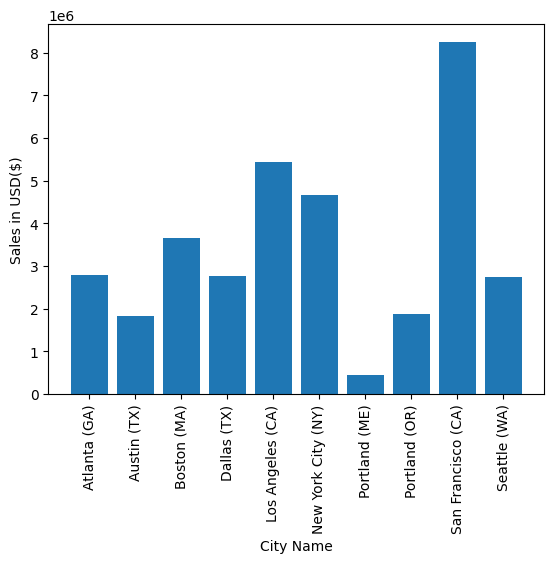

In [15]:
cities = [City for City, df in all_data.groupby("City")]
plt.bar(cities, result["Sales"])
plt.xticks(cities,rotation="vertical", size = 10)
plt.xlabel("City Name")
plt.ylabel("Sales in USD($)")
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

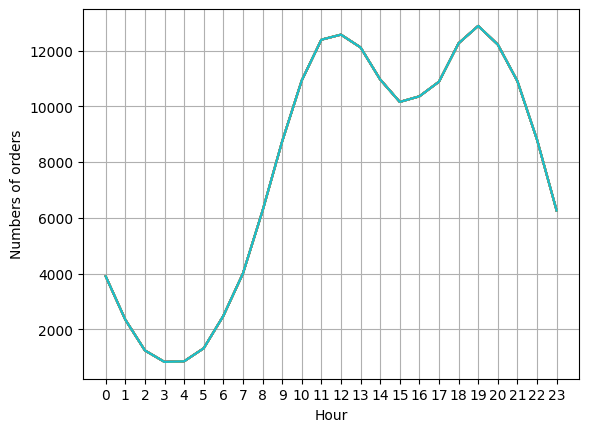

In [16]:
hours = [Hour for Hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Numbers of orders")
plt.show()
# My recommendation is around 11am (11) or 7pm (19)

#### Question 4: What products are most often sold together?

In [17]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.9,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.989998,Boston (MA)
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.0,Los Angeles (CA)
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99,Los Angeles (CA)


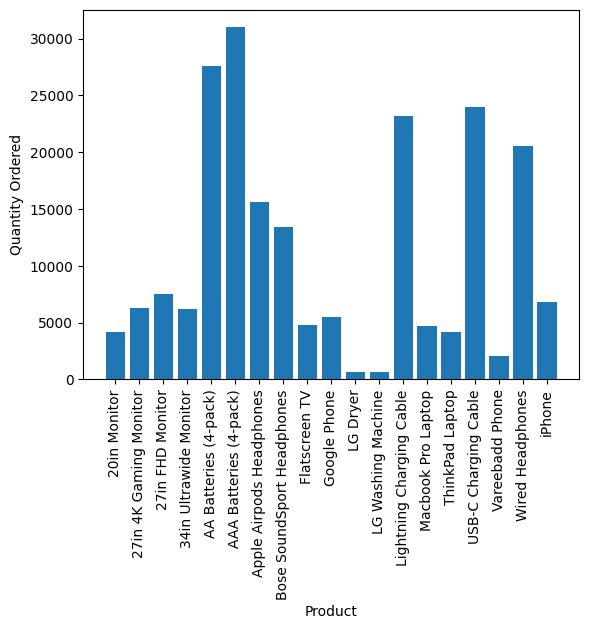

In [27]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum(numeric_only=True)["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size = 10)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

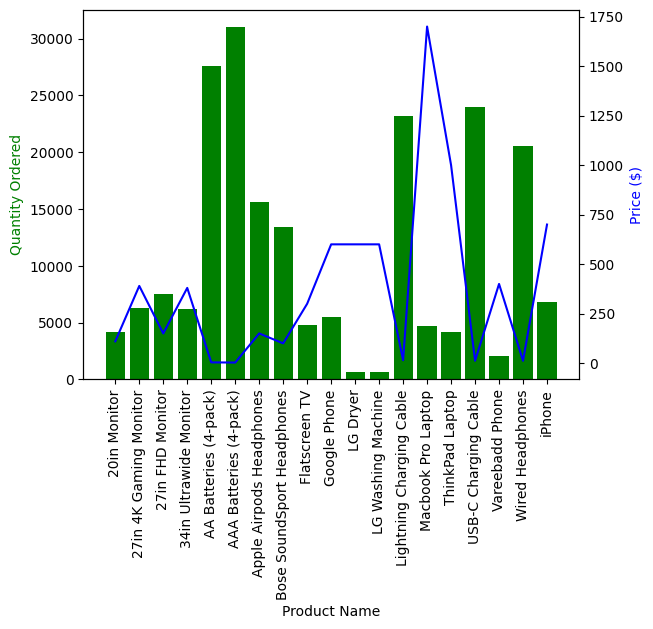

In [33]:
prices = all_data.groupby("Product").mean(numeric_only=True)["Price Each"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax1.set_xticklabels(products, rotation = "vertical", size = 10)
ax2.set_ylabel("Price ($)", color='b')

plt.show()